# Color Quantization

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

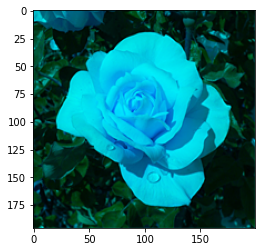

In [2]:
img = cv2.imread("Data/blomma.png")

plt.imshow(img)

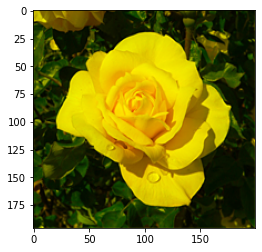

In [3]:
# Convert BGR to RGB manually (there is also functions for this)
flower = img[:,:, [2, 1, 0]]

plt.imshow(flower)

In [4]:
flower

array([[[200, 187,   0],
        [199, 184,   0],
        [204, 189,   0],
        ...,
        [ 27,  31,   0],
        [ 22,  26,   0],
        [ 50,  56,   0]],

       [[199, 183,   0],
        [200, 181,   0],
        [199, 181,   0],
        ...,
        [  7,  11,   0],
        [  1,   8,   0],
        [ 17,  26,   0]],

       [[200, 182,   0],
        [199, 184,   0],
        [198, 187,   0],
        ...,
        [  4,  16,   0],
        [  0,  14,   0],
        [ 20,  25,   0]],

       ...,

       [[ 24,  38,   0],
        [  9,  20,   0],
        [  7,  22,   0],
        ...,
        [ 42,  50,   0],
        [ 27,  70,   0],
        [ 35,  82,   0]],

       [[ 22,  34,   0],
        [ 11,  18,   0],
        [ 12,  22,   0],
        ...,
        [  8,  18,   0],
        [ 32,  49,   0],
        [ 57,  84,   0]],

       [[ 41,  50,   0],
        [ 17,  31,   0],
        [ 26,  41,   0],
        ...,
        [ 17,  23,   0],
        [ 22,  24,   0],
        [ 58,  62,   0]]

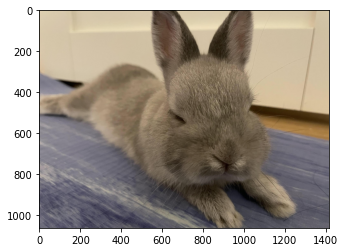

In [5]:
img = cv2.imread("Data/bella.jpeg")

# Convert BGR to RGB manually
rabbit = img[:,:,[2, 1, 0]]

plt.imshow(rabbit)

In [6]:
rabbit.shape[0], rabbit.shape[1]

(1063, 1417)

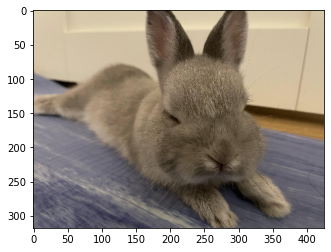

In [7]:
# Resize to smaller size
resize_factor = .3

height = rabbit.shape[0]
width = rabbit.shape[1]

rabbit = cv2.resize(rabbit, (int(width*resize_factor), int(height*resize_factor)))

plt.imshow(rabbit)

In [8]:
rabbit.shape[0], rabbit.shape[1]

(318, 425)

## Color quantization

(39200, 3)
Values before scaling: 0 255
Values after scaling: 0.0 1.0
Cluster Centers: [[0.12594709 0.16445658 0.        ]
 [0.86960004 0.75798583 0.        ]]


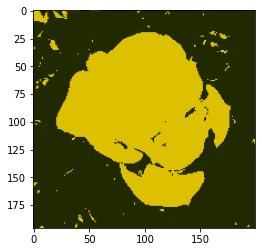

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

x_flower = flower.reshape(-1, 3)
print(x_flower.shape)

print("Values before scaling:", x_flower.min(), x_flower.max())
scaler = MinMaxScaler()

#Imshow wants values between 0 to 1
scaled_x_flower = scaler.fit_transform(x_flower)
print("Values after scaling:", scaled_x_flower.min(), scaled_x_flower.max())

kmeans = KMeans(2) # When we increase this it starts to become more closely to the orginal
kmeans.fit(scaled_x_flower)
print("Cluster Centers:", kmeans.cluster_centers_)

quantized_color_space = kmeans.cluster_centers_[kmeans.labels_]
quantized_flower = quantized_color_space.reshape(flower.shape)
plt.imshow(quantized_flower)

[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


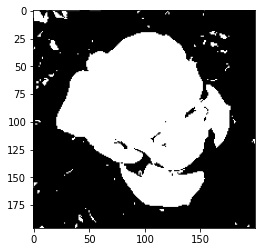

In [10]:
# We can also segmente the picture (pick out an interesting part)
mask = quantized_flower[:,:,1] > .75 
print(mask)
plt.imshow(mask, cmap="gray")

In [11]:
mask.shape, mask[:,:, None].shape #This gives another dimension 

((196, 200), (196, 200, 1))

(-0.5, 199.5, 195.5, -0.5)

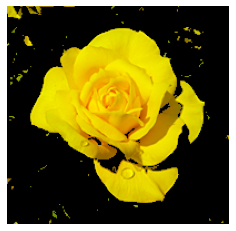

In [12]:
segmented_flower = mask[:,:, None]*flower #We need it to be in this dimension to multiplicate with the original flower

plt.imshow(segmented_flower)
plt.axis("off")

# We have removed the background and we now have 2 flowers
# It works well with strong colors 

### Reducing Colors 

This works better if we do not have distinct colors

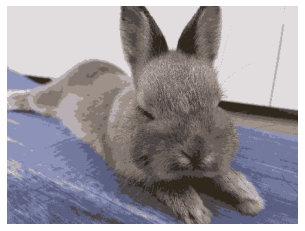

In [13]:
X_rabbit = rabbit.reshape(-1, 3)
scaled_X_rabbit = scaler.fit_transform(X_rabbit)

kmeans = KMeans(10)
kmeans.fit(scaled_X_rabbit)

quantized_color_space = kmeans.cluster_centers_[kmeans.labels_]
quantized_rabbit = quantized_color_space.reshape(rabbit.shape)
plt.imshow(quantized_rabbit)
plt.axis("off")
plt.savefig("fin_kanin.png")